In [307]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [308]:
dn = gum.InfluenceDiagram()

In [309]:
# Decision Nodes
government_support=dn.addDecisionNode(gum.LabelizedVariable('GovernmentSupport', 'government_support', ['no', 'yes']))

# Chance Nodes
school_motivation=dn.addChanceNode(gum.LabelizedVariable('SchoolMotivation','schoolmotivation', ['low', 'medium', 'high']))
academic_performance=dn.addChanceNode(gum.LabelizedVariable('AcademicPerformance','academic_performance', ['0-50', '50-60', '70-100']))
attendance=dn.addChanceNode(gum.LabelizedVariable('Attendance','attendance', ['low', 'high']))
family_support=dn.addChanceNode(gum.LabelizedVariable('FamilySupport', 'family_support', ['no', 'yes']))
internet=dn.addChanceNode(gum.LabelizedVariable('Internet', 'internet',['no','yes']))
family_income=dn.addChanceNode(gum.LabelizedVariable('FamilyIncome', 'family_income',['0-350000','350001-700000','700000+']))
financial_support=dn.addChanceNode(gum.LabelizedVariable('FinancialSupport', 'financial_support', ['no', 'yes']))
likelihood_of_dropout=dn.addChanceNode(gum.LabelizedVariable('LikelihoodOfDropout', 'likelihood_of_dropout', ['low', 'medium', 'high']))


# Utility Nodes
grant_applicability = dn.addUtilityNode(gum.LabelizedVariable('GrantApplicability', 'grant_applicability', 1))

In [310]:
# Addding arcs between the nodes
arcs = [(school_motivation, likelihood_of_dropout),(academic_performance, school_motivation), (attendance, school_motivation), (family_support, likelihood_of_dropout), (financial_support, likelihood_of_dropout), (government_support, financial_support), (family_income, financial_support),(internet, academic_performance),(likelihood_of_dropout, utility),(government_support, grant_applicability)]
for arc in arcs:
    dn.addArc(*arc)

In [311]:
dn.cpt('Attendance').fillWith([0.1,0.9])
dn.cpt('Internet').fillWith([0.3,0.7])
#bn.cpt('AcademicPerformance').fillWith([0.2,0.65,0.15])

dn.cpt('AcademicPerformance')[{'Internet': 0}] = [0.75,0.2, 0.05]
dn.cpt('AcademicPerformance')[{'Internet': 1}] =[0.05,0.75, 0.2]

# dn.cpt('GovernmentSupport').fillWith([0.92,0.08])
dn.cpt('FamilyIncome').fillWith([0.3,0.4,0.2])
# bn.cpt('FinancialSupport').fillWith([0.5,0.35,0.15,0,0,0])

dn.cpt('FamilySupport').fillWith([0.33,0.67])

dn.cpt('SchoolMotivation')[{'AcademicPerformance': 0, 'Attendance': 0}] = [1, 0, 0]
dn.cpt('SchoolMotivation')[{'AcademicPerformance': 0, 'Attendance': 1}] = [0.6, 0.15, 0.25]
dn.cpt('SchoolMotivation')[{'AcademicPerformance': 1, 'Attendance': 0}] = [0.4, 0.5, 0.1]
dn.cpt('SchoolMotivation')[{'AcademicPerformance': 1, 'Attendance': 1}] = [0.2, 0.525, 0.275]
dn.cpt('SchoolMotivation')[{'AcademicPerformance': 2, 'Attendance': 0}] = [0.1, 0.675, 0.225]
dn.cpt('SchoolMotivation')[{'AcademicPerformance': 2, 'Attendance': 1}] = [0.05, 0.8, 0.15]

dn.cpt('FinancialSupport')[{'FamilyIncome': 0, 'GovernmentSupport': 0}] = [1, 0]
dn.cpt('FinancialSupport')[{'FamilyIncome': 0, 'GovernmentSupport': 1}] = [0.35, 0.65]#
dn.cpt('FinancialSupport')[{'FamilyIncome': 1, 'GovernmentSupport': 0}] = [0.2, 0.8]#
dn.cpt('FinancialSupport')[{'FamilyIncome': 1, 'GovernmentSupport': 1}] = [0.1, 9]#
dn.cpt('FinancialSupport')[{'FamilyIncome': 2, 'GovernmentSupport': 0}] = [0.05, 0.95]
dn.cpt('FinancialSupport')[{'FamilyIncome': 2, 'GovernmentSupport': 1}] = [0, 1]

dn.cpt('LikelihoodOfDropout')[{'FamilySupport': 0, 'FinancialSupport': 0, 'SchoolMotivation': 0}] = [0.0, 0.45, 0.55]
dn.cpt('LikelihoodOfDropout')[{'FamilySupport': 0, 'FinancialSupport': 0, 'SchoolMotivation': 1}] = [0.1, 0.5, 0.4]
dn.cpt('LikelihoodOfDropout')[{'FamilySupport': 0, 'FinancialSupport': 0, 'SchoolMotivation': 2}] = [0.425, 0.325, 0.25]
dn.cpt('LikelihoodOfDropout')[{'FamilySupport': 0, 'FinancialSupport': 1, 'SchoolMotivation': 0}] = [0.2, 0.5, 0.3]
dn.cpt('LikelihoodOfDropout')[{'FamilySupport': 0, 'FinancialSupport': 1, 'SchoolMotivation': 1}] = [0.35, 0.5, 0.15]
dn.cpt('LikelihoodOfDropout')[{'FamilySupport': 0, 'FinancialSupport': 1, 'SchoolMotivation': 2}] = [0.575, 0.325, 0.1] 
dn.cpt('LikelihoodOfDropout')[{'FamilySupport': 1, 'FinancialSupport': 0, 'SchoolMotivation': 0}] = [0.4, 0.475, 0.125]
dn.cpt('LikelihoodOfDropout')[{'FamilySupport': 1, 'FinancialSupport': 0, 'SchoolMotivation': 1}] = [0.6, 0.3, 0.1]
dn.cpt('LikelihoodOfDropout')[{'FamilySupport': 1, 'FinancialSupport': 0, 'SchoolMotivation': 2}] = [.75, 0.155, 0.095]
dn.cpt('LikelihoodOfDropout')[{'FamilySupport': 1, 'FinancialSupport': 1, 'SchoolMotivation': 0}] = [0.725, 0.225, 0.05]#
dn.cpt('LikelihoodOfDropout')[{'FamilySupport': 1, 'FinancialSupport': 1, 'SchoolMotivation': 1}] = [0.8, 0.15, 0.05]#
dn.cpt('LikelihoodOfDropout')[{'FamilySupport': 1, 'FinancialSupport': 1, 'SchoolMotivation': 2}] = [0.9, 0.08, 0.02 ]#

dn.utility('GrantApplicability')[{'LikelihoodOfDropout': 0, 'GovernmentSupport': 0}] = 20
dn.utility('GrantApplicability')[{'LikelihoodOfDropout': 0, 'GovernmentSupport': 1}] = 18
dn.utility('GrantApplicability')[{'LikelihoodOfDropout': 1, 'GovernmentSupport': 0}] = 10
dn.utility('GrantApplicability')[{'LikelihoodOfDropout': 1, 'GovernmentSupport': 1}] = 8
dn.utility('GrantApplicability')[{'LikelihoodOfDropout': 2, 'GovernmentSupport': 0}] = 0
dn.utility('GrantApplicability')[{'LikelihoodOfDropout': 2, 'GovernmentSupport': 1}] = -2
# dn.cpt('LikelihoodOfDropout')
# dn.cpt('FinancialSupport')

In [312]:
dn

(pyAgrum.InfluenceDiagram<double>@0000021EF7EDADD0) Influence Diagram{
  chance: 8,
  utility: 1,
  decision: 1,
  arcs: 10,
  domainSize: 2592
}

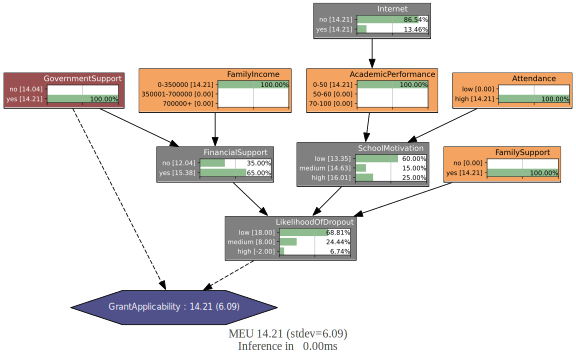

In [313]:
#setting evidence
#scenario 1
gnb.showInference(dn, evs={'FamilyIncome':'0-350000','AcademicPerformance':'0-50','FamilySupport':'yes', 'Attendance':'high'})
dn.saveBIFXML("DN_scenario1.bif")

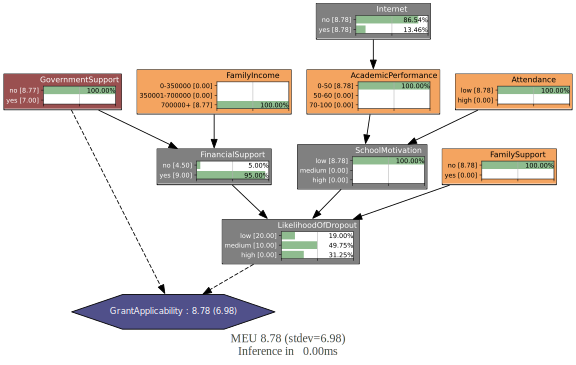

In [314]:
#scenario2
gnb.showInference(dn, evs={'FamilyIncome':'700000+','AcademicPerformance':'0-50','FamilySupport':'no', 'Attendance':'low'})
dn.saveBIFXML("DN_scenario2.bif")

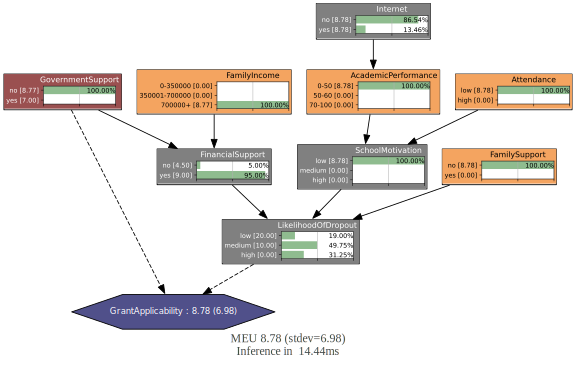

In [315]:
#scenario2
gnb.showInference(dn, evs={'FamilyIncome':'700000+','AcademicPerformance':'0-50','FamilySupport':'no', 'Attendance':'low'})
dn.saveBIFXML("DN_scenario2.bif")